In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
import pandas as pd
data = pd.read_csv('Drug_Data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100526 entries, 0 to 100525
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Condition     100526 non-null  object 
 1   Drug          100526 non-null  object 
 2   Indication    100526 non-null  object 
 3   Type          100526 non-null  object 
 4   Reviews       100526 non-null  object 
 5   Effective     100526 non-null  float64
 6   EaseOfUse     100526 non-null  float64
 7   Satisfaction  100526 non-null  float64
 8   Information   100526 non-null  object 
dtypes: float64(3), object(6)
memory usage: 6.9+ MB


In [6]:
data.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
1,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
2,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
3,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,437 Reviews,3.26,3.23,2.42,\r\n\t\t\t\t\tAmoxicillin/clavulanic acid is a...
4,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,361 Reviews,2.44,2.96,1.68,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...


In [7]:
data.describe()

,Effective,EaseOfUse,Satisfaction
count,100526.000000,100526.000000,100526.000000
mean,3.537109,3.935037,3.178326
std,1.122137,1.048564,1.225872
min,0.950007,0.950036,0.950006
25%,2.990223,3.511813,2.365056
50%,3.700000,4.086120,3.100553
75%,4.328519,4.818468,4.024897
max,5.049998,5.049992,5.049994


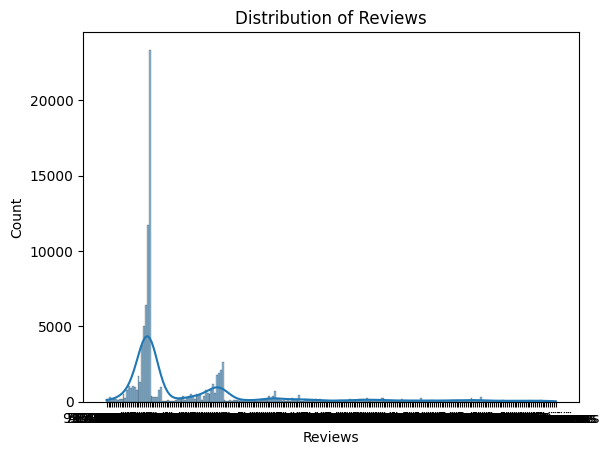

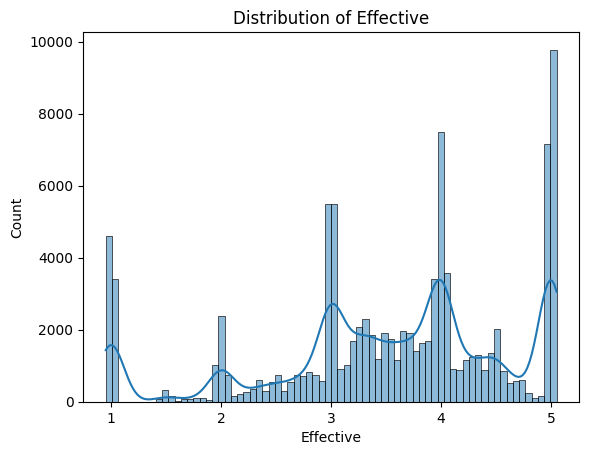

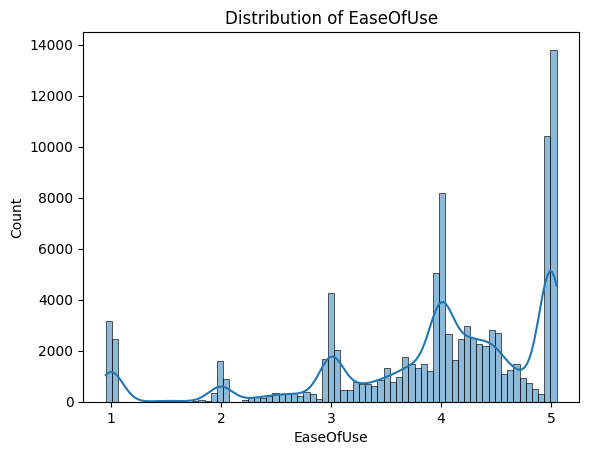

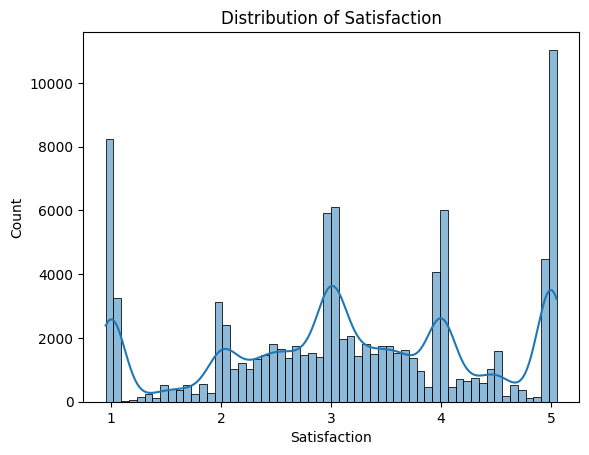

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = ['Reviews', 'Effective', 'EaseOfUse', 'Satisfaction']
for col in numerical_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


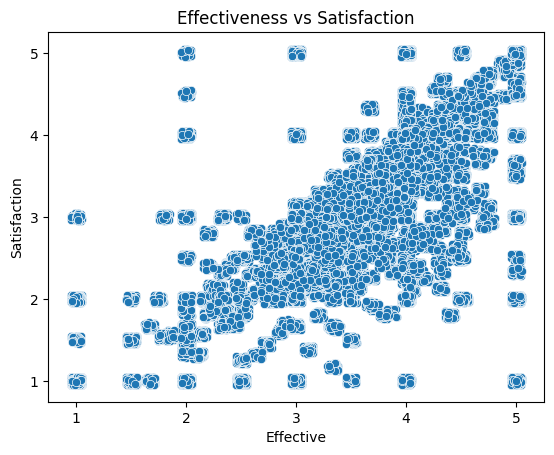

In [18]:
sns.scatterplot(x='Effective', y='Satisfaction', data=data)
plt.title("Effectiveness vs Satisfaction")
plt.show()



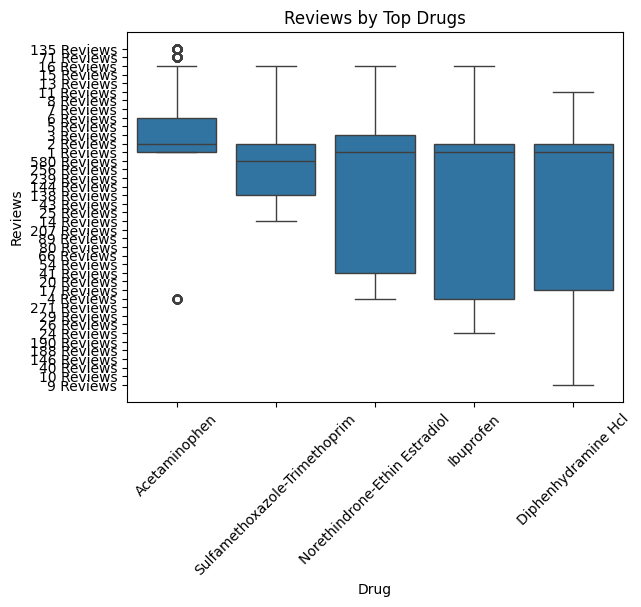

In [17]:

top_drugs = data['Drug'].value_counts().head(5).index
filtered_data = data[data['Drug'].isin(top_drugs)]

sns.boxplot(x='Drug', y='Reviews', data=filtered_data)
plt.title("Reviews by Top Drugs")
plt.xticks(rotation=45)
plt.show()


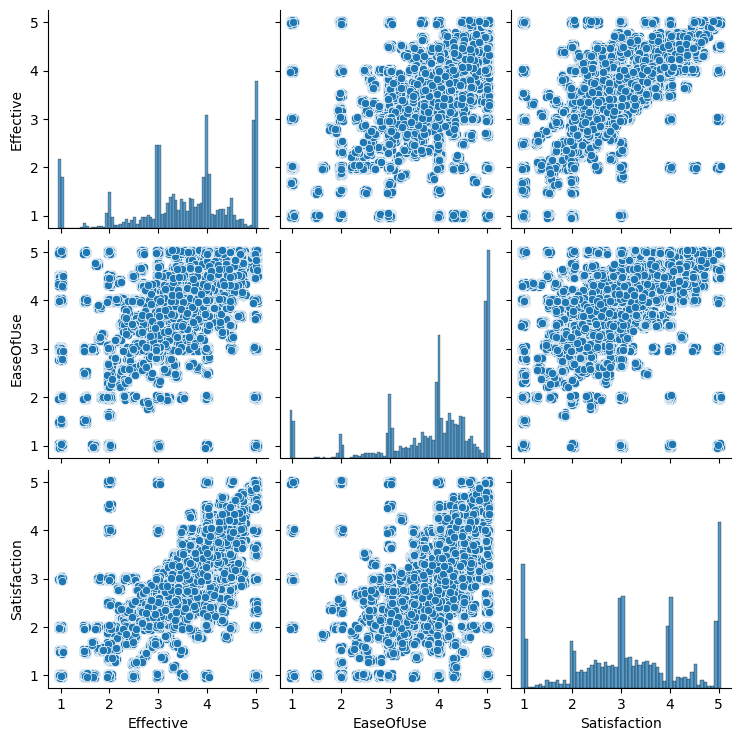

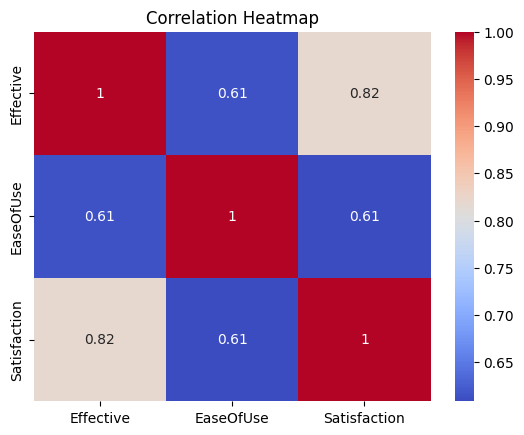

In [19]:
sns.pairplot(data[numerical_cols])
plt.show()
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



In [21]:
data['Reviews'] = data['Reviews'].str.extract('(\d+)').astype(float)
print(data.isnull().sum())
numerical_cols = ['Reviews', 'Effective', 'EaseOfUse', 'Satisfaction']
for col in numerical_cols:
    data[col].fillna(data[col].mean(), inplace=True)
data.dropna(thresh=0.9 * data.shape[1], inplace=True)


Condition       0
Drug            0
Indication      0
Type            0
Reviews         0
Effective       0
EaseOfUse       0
Satisfaction    0
Information     0
dtype: int64


<ipython-input-21-d85ee7bbdf28>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


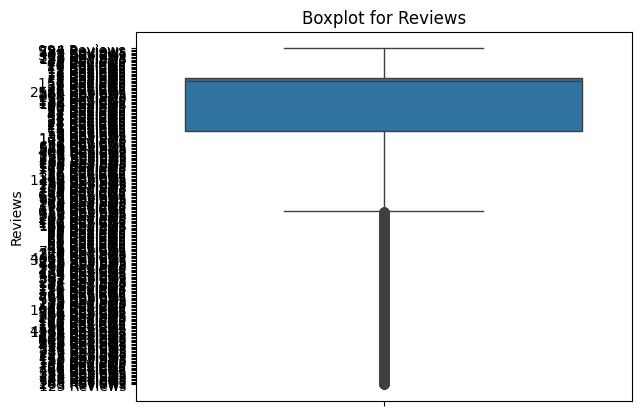

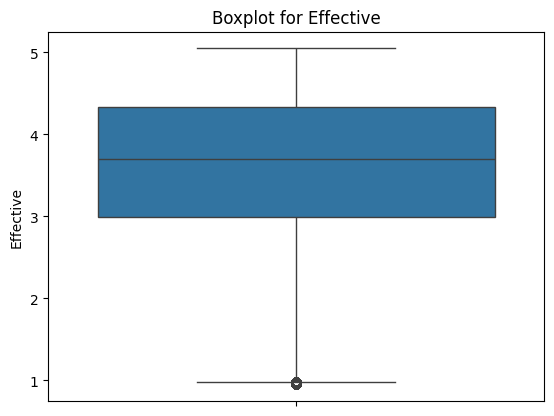

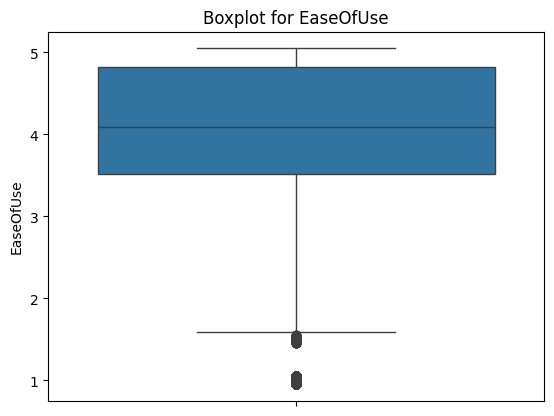

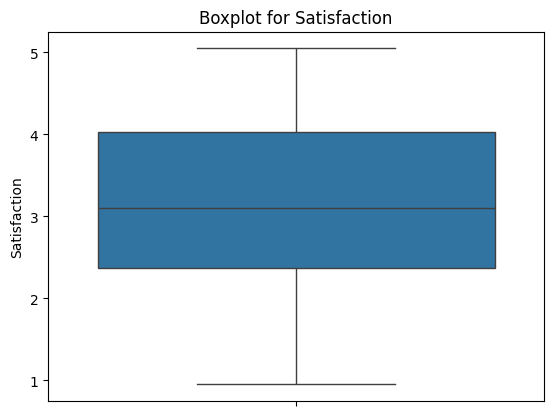

In [14]:

for col in numerical_cols:
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


In [23]:
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)
data = data[~((data[numerical_cols] < lower_bound) | (data[numerical_cols] > upper_bound)).any(axis=1)]



Reviews        -20.000000
Effective        0.743736
EaseOfUse        1.958097
Satisfaction     0.101023
dtype: float64 Reviews         36.000000
Effective        6.823963
EaseOfUse        6.775281
Satisfaction     7.006625
dtype: float64


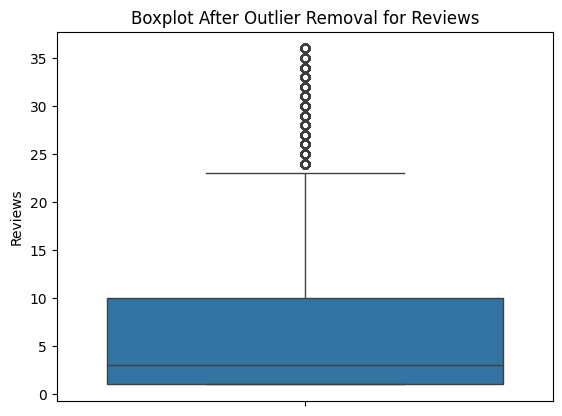

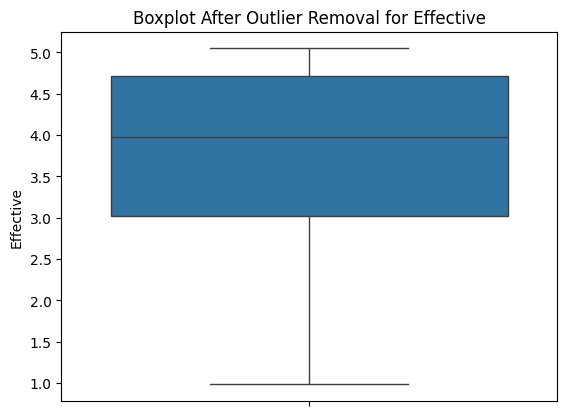

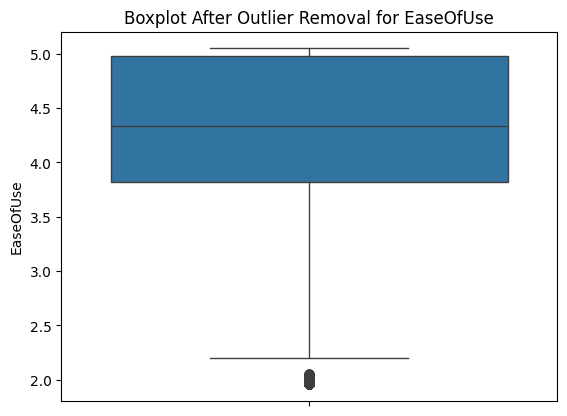

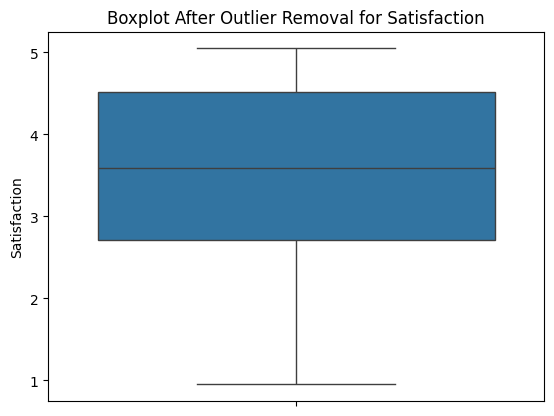

In [24]:

for col in numerical_cols:
    sns.boxplot(data[col])
    plt.title(f"Boxplot After Outlier Removal for {col}")
    plt.show()
